In [14]:
# Проделаем аналитические выкладки, чтобы найти матрицу перехода в инварианты Римана

# Импорт используемых модулей
from sympy import Matrix, symbols, init_printing, diag
init_printing()

# Акустическая модель 1D
rho, c = symbols("rho c")
print("Let's deal with 1D problem.")
A = Matrix([[0, 1 / rho],[rho * c**2, 0]]) # Создаём матрицу для 1D акустической задачи
print("The matrix A = ")
display(A)
l = A.eigenvals() # Вычисляем её собственные значения
print("It has two eigenvalues: ")
display(l)
e = A.eigenvects() # Вычисляем её собственные вектора
print("It has two eigenvectors: ")
display(e)
# У нас справедливо тождество A = Omega^(-1) * Lambda * Omega
Omega_inv = Matrix([[- 1 / (rho * c), 1 / (rho * c)], [1, 1]]) # Заполняем матрицу Omega^(-1)
Omega = Omega_inv.inv() # Вычисляем матрицу Omega
Lambda = diag(-c, c) # Заполняем матрицу Lambda
# Проверим разложение
print("Matrix of eigenvalues Lambda: ")
display(Lambda)
print("Omega^(-1) matrix: ")
display(Omega_inv)
print("Omega matrix: ")
display(Omega)
print("Omega^(-1) * Lambda * Omega: ")
display(Omega_inv * Lambda * Omega)
print("Again, A: ")
display(A)

Let's deal with 1D problem.
The matrix A = 


⎡      1⎤
⎢ 0    ─⎥
⎢      ρ⎥
⎢       ⎥
⎢ 2     ⎥
⎣c ⋅ρ  0⎦

It has two eigenvalues: 


It has two eigenvectors: 


⎡⎛       ⎡⎡-1 ⎤⎤⎞  ⎛      ⎡⎡ 1 ⎤⎤⎞⎤
⎢⎜       ⎢⎢───⎥⎥⎟  ⎜      ⎢⎢───⎥⎥⎟⎥
⎢⎜-c, 1, ⎢⎢c⋅ρ⎥⎥⎟, ⎜c, 1, ⎢⎢c⋅ρ⎥⎥⎟⎥
⎢⎜       ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

Matrix of eigenvalues Lambda: 


⎡-c  0⎤
⎢     ⎥
⎣0   c⎦

Omega^(-1) matrix: 


⎡-1    1 ⎤
⎢───  ───⎥
⎢c⋅ρ  c⋅ρ⎥
⎢        ⎥
⎣ 1    1 ⎦

Omega matrix: 


⎡-c⋅ρ      ⎤
⎢─────  1/2⎥
⎢  2       ⎥
⎢          ⎥
⎢ c⋅ρ      ⎥
⎢ ───   1/2⎥
⎣  2       ⎦

Omega^(-1) * Lambda * Omega: 


⎡      1⎤
⎢ 0    ─⎥
⎢      ρ⎥
⎢       ⎥
⎢ 2     ⎥
⎣c ⋅ρ  0⎦

Again, A: 


⎡      1⎤
⎢ 0    ─⎥
⎢      ρ⎥
⎢       ⎥
⎢ 2     ⎥
⎣c ⋅ρ  0⎦

Действие оператора Omega на вектор [v, p] имеет вид: 


⎡  c⋅ρ⋅v   p⎤
⎢- ───── + ─⎥
⎢    2     2⎥
⎢           ⎥
⎢ c⋅ρ⋅v   p ⎥
⎢ ───── + ─ ⎥
⎣   2     2 ⎦

Действие оператора Omega^(-1) на вектор [w_1, w_2] имеет вид: 


⎡   ω₁    ω₂⎤
⎢- ─── + ───⎥
⎢  c⋅ρ   c⋅ρ⎥
⎢           ⎥
⎣  ω₁ + ω₂  ⎦

На правой границе мы не знаем значение инварианта w_1,т.к. он выходит за границу области.
Но мы можем найти связь между w_1 и w_2, задав, например, физическое условие
alpha * p^(n + 1) + beta * v^(n+1) == gamma.
Оно имеет вид w_1 ==


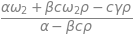

Тогда итоговые формулы на правой границе примут вид:


⎡ ω₂   α⋅ω₂ + β⋅c⋅ω₂⋅ρ - c⋅γ⋅ρ⎤
⎢─── - ───────────────────────⎥
⎢c⋅ρ       c⋅ρ⋅(α - β⋅c⋅ρ)    ⎥
⎢                             ⎥
⎢     α⋅ω₂ + β⋅c⋅ω₂⋅ρ - c⋅γ⋅ρ ⎥
⎢ω₂ + ─────────────────────── ⎥
⎣            α - β⋅c⋅ρ        ⎦

На левой границе мы не знаем значение инварианта w_2,т.к. он выходит за границу области.
Но мы можем найти связь между w_1 и w_2, задав, например, физическое условие
alpha * p^(n + 1) + beta * v^(n+1) == gamma.
Оно имеет вид w_2 ==


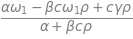

Тогда итоговые формулы на левой границе примут вид:


⎡   ω₁   α⋅ω₁ - β⋅c⋅ω₁⋅ρ + c⋅γ⋅ρ⎤
⎢- ─── + ───────────────────────⎥
⎢  c⋅ρ       c⋅ρ⋅(α + β⋅c⋅ρ)    ⎥
⎢                               ⎥
⎢      α⋅ω₁ - β⋅c⋅ω₁⋅ρ + c⋅γ⋅ρ  ⎥
⎢ ω₁ + ───────────────────────  ⎥
⎣             α + β⋅c⋅ρ         ⎦

In [15]:
# Аналитически получим формулы, применимые в граничных узлах
from sympy import solve
w_1, w_2 = symbols("omega_1 omega_2")
w = Matrix([w_1, w_2])
v, p = symbols("v p")
v_0 = symbols('v_0')
q = Matrix([v, p])
print("Действие оператора Omega на вектор [v, p] имеет вид: ")
display(Omega * q)
print("Действие оператора Omega^(-1) на вектор [w_1, w_2] имеет вид: ")
display(Omega_inv * w)

alpha, beta, gamma = symbols('alpha beta gamma')
eq = alpha * (w_2 - w_1) / (c * rho) + beta * (w_1 + w_2) - gamma

print("На правой границе мы не знаем значение инварианта w_1,"
      "т.к. он выходит за границу области.")
print("Но мы можем найти связь между w_1 и w_2, задав, например, физическое условие"
      "\nalpha * p^(n + 1) + beta * v^(n+1) == gamma.")
sol = solve(eq, w_1)
print("Оно имеет вид w_1 ==")
display(sol[0])
print("Тогда итоговые формулы на правой границе примут вид:")
display((Omega_inv * w).subs(w_1, sol[0]))

print("На левой границе мы не знаем значение инварианта w_2,"
      "т.к. он выходит за границу области.")
print("Но мы можем найти связь между w_1 и w_2, задав, например, физическое условие"
      "\nalpha * p^(n + 1) + beta * v^(n+1) == gamma.")
sol = solve(eq, w_2)
print("Оно имеет вид w_2 ==")
display(sol[0])
print("Тогда итоговые формулы на левой границе примут вид:")
display((Omega_inv * w).subs(w_2, sol[0]))

In [13]:
'''
Правая граница
v = (w2 - (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)) / (c * rho)
p = w2 + (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)

Левая граница
v = (-w1 + (alpha * w1 - beta * c * w1 * rho - c * gamma * rho) / (alpha + beta * c * rho)) / (c * rho)
p = w1 + (alpha * w2 - beta * c * w2 * rho + c * gamma * rho) / (alpha + beta * c * rho)
'''

'\nПравая граница\nv = (w2 - (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)) / (c * rho)\np = w2 + (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)\n\nЛевая граница\nv = (-w1 + (alpha * w1 - beta * c * w1 * rho - c * gamma * rho) / (alpha + beta * c * rho)) / (c * rho)\np = w1 + (alpha * w2 - beta * c * w2 * rho + c * gamma * rho) / (alpha + beta * c * rho)\n'

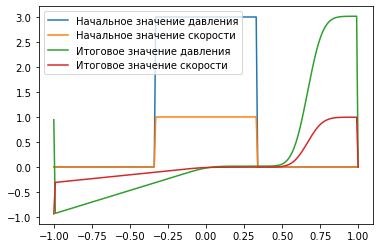

In [29]:
# Импортируем numpy для хранения результатов расчётов
import numpy as np

# Импортируем модуль matplolib для визуализации результатов
import matplotlib.pyplot as plt

# Определим параметры 1D акустической задачи
L = 2.0 # x = [-1,1]
rho = 3.0 # плотность в кг/м^3
c = 1.0 # скорость волны в м/с
T = 0.5 * L / c # время моделирования - отражение от правой границы
#T = 2.0 * L / c # время моделирования - отражение ещё и от левой границы
M = 201 # количество узлов вдоль оси
h = L / M # шаг по координате, h
dt = 0.4 * h / c # коэффициент должен быть меньше единицы
# В каждом узле мы храним значение давления и скорости среды
data_current = np.zeros(M, dtype=[('v', np.float64), ('p', np.float64)])
data_next = np.zeros(M, dtype=[('v', np.float64), ('p', np.float64)])
alpha, beta, gamma = 1, 1, 0.01

# Определим теперь функции, которые на основании Omega и Omega^(-1) умеют нам возвращать трансформированный вектор
def Omega(q):
    v, p = q
    return (-rho * c / 2.0 * v + p / 2.0, rho * c / 2.0 * v + p / 2.0)

def OmegaInv(w1, w2):
    return (- w1 / (rho * c) + w2 / (rho * c), w1 + w2)

# Начальные значения в виде продольной волны
for i in range(int(1.0 / 3.0 * M), int(2.0 / 3.0 * M)):
    data_current[i]['v'] = 1.0
    data_current[i]['p'] = rho * c * data_current[i]['v'] # -rho * c / 2 * V + P / 2 = 0

# Рисуем график до начала расчёта
x_m = np.linspace(-1.0, L - 1.0, M)
plt.plot(x_m, data_current['p'], label="Начальное значение давления")
plt.plot(x_m, data_current['v'], label="Начальное значение скорости")
for j in range(int(T / dt)):
    for i in range(M):
        # w1 for -c, w2 for +c
        if i == 0: # Левая граница области, здесь обеспечим alpha * p + beta * v = gamma
            w1, _  = Omega(data_current[i])
            w1n, _ = Omega(data_current[i + 1])
            w1_new = w1 + c * dt / h * (w1n - w1)
            data_next[i]['v'] = (-w1 + (alpha * w1 - beta * c * w1 * rho - c * gamma * rho) / (alpha + beta * c * rho)) / (c * rho)
            data_next[i]['p'] = w1 + (alpha * w1 - beta * c * w1 * rho + c * gamma * rho) / (alpha + beta * c * rho)
        elif i == M - 1: # Правая граница области, здесь обеспечим alpha * p + beta * v = gamma
            _, w2  = Omega(data_current[i])
            _, w2p = Omega(data_current[i - 1])
            w2_new = w2 - c * dt / h * (w2 - w2p)
            data_next[i]['v'] = (w2 - (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)) / (c * rho)
            data_next[i]['p'] = w2 + (alpha * w2 + beta * c * w2 * rho - c * gamma * rho) / (alpha - beta * c * rho)
        else: # Внутри области
            w1, w2   = Omega(data_current[i])
            w1p, w2p = Omega(data_current[i - 1])
            w1n, w2n = Omega(data_current[i + 1])
            # Решаем уравнения переноса на инварианты (правильно-сторонний шаблон)
            w1_new = w1 + c * dt / h * (w1n - w1)
            w2_new = w2 - c * dt / h * (w2 - w2p)
            # Возвращаемся в исходные переменные
            data_next[i]['v'], data_next[i]['p'] = OmegaInv(w1_new, w2_new)
    # Обновляем весь слой
    for i in range(M):
        data_current[i] = data_next[i]
    
# Рисуем график по окончанию расчёта
plt.plot(x_m, data_current['p'], label="Итоговое значение давления")
plt.plot(x_m, data_current['v'], label="Итоговое значение скорости")
plt.legend()
plt.show()